# Assignment \#2 : Introduction to Stellar Spectra
Kaimi Kahihikolo

Due: 4 February 2019

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Boltzmann-Equation" data-toc-modified-id="Boltzmann-Equation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Boltzmann Equation</a></span></li><li><span><a href="#Saha-Equation" data-toc-modified-id="Saha-Equation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Saha Equation</a></span></li><li><span><a href="#Working-with-Stellar-Spectrum" data-toc-modified-id="Working-with-Stellar-Spectrum-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Working with Stellar Spectrum</a></span><ul class="toc-item"><li><span><a href="#Plotting-Spectrum" data-toc-modified-id="Plotting-Spectrum-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plotting Spectrum</a></span></li><li><span><a href="#Selected-Spectral-Lines" data-toc-modified-id="Selected-Spectral-Lines-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Selected Spectral Lines</a></span></li><li><span><a href="#Instrumental-Profile" data-toc-modified-id="Instrumental-Profile-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Instrumental Profile</a></span><ul class="toc-item"><li><span><a href="#Repeating-process-for-the-remaining-spectral-lines" data-toc-modified-id="Repeating-process-for-the-remaining-spectral-lines-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Repeating process for the remaining spectral lines</a></span></li></ul></li><li><span><a href="#Measure-Radial-Velocities" data-toc-modified-id="Measure-Radial-Velocities-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Measure Radial Velocities</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as const

## Boltzmann Equation

Using the information given in the book by LeBlanc, calculate the ratio $n_2/n_1$ of populations of the first excited versus ground level of H for the following temperatures:

- 3000 K
- 5000 K
- 8000 K
- 10000 K

Recall the Boltzmann Equation,

$$\frac{n_2}{n_1} = \frac{g_2}{g_1} \exp\left(-\frac{E_2-E_1}{kT}\right)$$

In [2]:
def En(n):
    return 13.6* u.eV * (1 - 1/n**2)

def n2_n1(n1, n2, T):
    g2 = 2*n2**2
    g1 = 2*n1**2
    E2 = En(n2)
    E1 = En(n1)
    
    return (g2/g1)*np.exp(-(E2-E1)/(const.k_B * T))

In [3]:
for T in [3000, 5000, 8000, 10000]:
    print(f'n2/n1 (T = {T} [K]) = ', n2_n1(n1=1, n2=2, T=T * u.K))

n2/n1 (T = 3000 [K]) =  2.929600122214504e-17
n2/n1 (T = 5000 [K]) =  2.0936737286961372e-10
n2/n1 (T = 8000 [K]) =  1.5008615232598242e-06
n2/n1 (T = 10000 [K]) =  2.893906514520562e-05


___
## Saha Equation

Assume a star made of pure H. At some point near the photosphere, the mass density is $\rho= 3.5 \times 10^{-7} [g cm^{-3}]$. 

**Calculate the number density $n_H$ of H atoms, assuming that most of the H is neutral.**

In [4]:
rho = (3.5e-7)*u.g*(u.cm)**(-3)

M_H = 1.01e-3 * u.kg / u.mol

n_H = const.N_A * rho / M_H

print(f'\t n_H = {n_H.to(u.cm**(-3))}')

	 n_H = 2.086880495e+17 1 / cm3


Using the Saha equation, calculate the number of protons in the gas at the following temperatures:

- 3000 K
- 5000 K
- 8000 K

Recall the Saha equation,

$$\frac{n_{i+1}}{n_{i}} = \frac{1}{n_e} \left(\frac{2\pi m_ekT}{h^2}\right)^{3/2}\frac{2U_{i+1}}{U_i} \exp\left(\frac{-E_{ion}}{kT}\right)$$

where, for hydrogen we take $U_{II} = 1$ and $U_{I} = 2$ (LeBlanc page 20, example 1.7).

In [5]:
def saha(n_H, T):
    
    term1 = (2.*np.pi*const.m_e*const.k_B*T)**(1.5) / (const.h**3)
    term2 = 1.0
    term3 = np.exp(-13.6*u.eV/(const.k_B * T).decompose())
    
    return (1./n_H)*term1*term2*term3

In [6]:
for T in [3000, 5000, 8000]:
    print(f'\t T={T} [K] : ', saha(n_H=n_H, T=T*u.K).decompose())

	 T=3000 [K] :  2.7042200212078446e-20
	 T=5000 [K] :  8.009695872560393e-11
	 T=8000 [K] :  2.2406369528646064e-05


repeating the process for a density $\rho = 3.5\times 10^{-8} [g cm^{−3}]$

In [7]:
rho2 = (3.5e-8)*u.g*(u.cm)**(-3)
n_H = const.N_A * rho2 / M_H

for T in [3000, 5000, 8000]:
    print(f'\t T={T} [K] : ', saha(n_H=n_H, T=T*u.K).decompose())

	 T=3000 [K] :  2.7042200212078443e-19
	 T=5000 [K] :  8.009695872560395e-10
	 T=8000 [K] :  0.0002240636952864606


**What conclusion can you extract from a comparison of the two sets of calculations?**

The degree of ionization and the density are inversely proportional. That is to say, for a given temperature, as density goes up, the degree of ionization goes up down. Additionally, the recombination rate of two particles increases more rapdily when the density goes up, and the ionization fraction goes down.

___
## Working with Stellar Spectrum

File 1753905in.s is the wavelength-calibrated spectrum of a star, obtained with the high-resolution echelle spectrograph Espadons, which is a benchmounted instrument, fiber-fed from a Cassegrain unit at the Canada-FranceHawaii Telescope (CFHT) on Maunakea, Hawaii. The spectral resolution of this spectrograph is $R = \lambda/\Delta\lambda = 68000$

In [8]:
import pandas as pd
import numpy as np
import astropy.units as u

temp = np.genfromtxt("1753905in.s", skip_header=2)
df = pd.DataFrame(temp)

df.columns = [f'col_{i}' for i in range(7)]

df.col_0 = (df.col_0 * u.nm).values.to('AA')

df.sort_values(by=['col_0'], inplace=True)
df.head(10)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6
0,3698.862,0.346070,0.022133,-0.017995,0.20457,0.017536,0.015871
1,3698.885,0.462900,0.042772,-0.008579,0.17882,0.015596,0.013454
2,3698.908,0.427550,0.036014,-0.012032,0.18526,0.015008,0.015618
3,3698.931,-0.191270,0.019585,0.047379,0.20943,0.017839,0.016422
4,3698.954,0.424050,0.028423,-0.020517,0.18654,0.016349,0.013906
5,3698.977,0.026025,0.002400,-0.000488,0.16446,0.012933,0.014366
6,3699.000,1.471300,0.095675,-0.074646,0.19665,0.016224,0.016179
7,3699.023,-0.353180,-0.044054,-0.006890,0.18427,0.015102,0.015299
8,3699.047,0.307520,0.024930,-0.009798,0.16019,0.013474,0.012813
9,3699.070,0.606520,0.044586,-0.024719,0.19982,0.016656,0.016199


___
### Plotting Spectrum

Write a computer program that will read all the data and plot the spectrum
between 4200 and 6700 Angstroms. 

**What are the strongest absorptions? Can you identify them?**

In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')

In [10]:
## Some common lines I will highlight
absp_lines = {
        'O II' : 3726,
        'O II(2)' : 3728.8,
        'H10' : 3797.9,
        'H9' : 3835.4,
        'Ne III' : 3868.7,
        'H8' : 3889,
        'Ca II (H)' : 3933.7,
        'Ca II (K)' : 3968.5,
        'H7' : 3970.1,
        r'H$\delta$' : 4101.7,
        r'H$\gamma$' : 4340.5,
        r'H$\beta$' : 4861.3,
        'O III' : 4958.9,
        'O III (2)' : 5006.8,
        'He I' : 5875.6,
        'N II' : 6548,
        r'H$\alpha$' : 6562.8,
        'N II (2)' : 6583.4,
        'S II' : 6716.5,
        'S II (2)' : 6730.8,
        'Ar III' : 7135.8,
        'S III' : 9068.9,
        'S III (2)' : 9530.6
    }

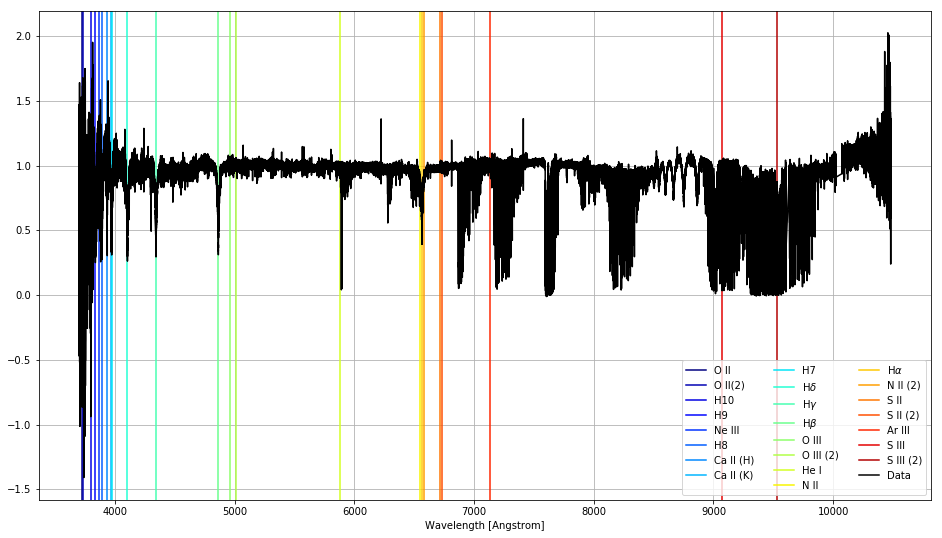

In [11]:
fig = plt.figure(figsize=(16,9))

[plt.axvline(absp_lines[line], label=line, 
             c=plt.cm.jet(i/23.)) for i, line in enumerate(absp_lines)]
    
plt.plot(df.col_0, df.col_1, color='k', label='Data')

plt.legend(loc=4, ncol=3)
plt.xlabel('Wavelength [Angstrom]')
plt.grid()
plt.savefig('spectra_full.png', dpi=300, bbox_inches='tight')

Zooming into the region between $4200$ and $6700$ angstrom.

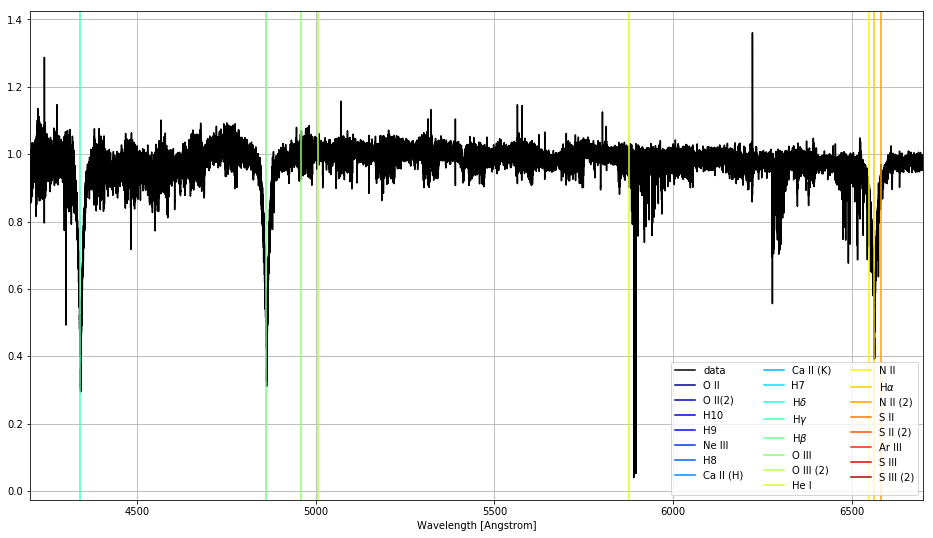

In [12]:
fig = plt.figure(figsize=(16,9))
trim_df = df[(df.col_0 > 4200 * u.AA) & (df.col_0 < 6700 * u.AA)]

plt.plot(trim_df.col_0, trim_df.col_1, color='k' , label='data')

[plt.axvline(absp_lines[line], label=line, 
             c=plt.cm.jet(i/23.)) for i, line in enumerate(absp_lines)]


plt.legend(loc=4, ncol=3)
plt.xlabel('Wavelength [Angstrom]')
plt.grid()
plt.xlim(4200, 6700)
plt.show()
plt.savefig('spectra_zoom.png', dpi=300, bbox_inches='tight')

### Selected Spectral Lines
Adapt your program so that you can plot the following features:

- [Mg II] 4481.228
- [Fe II] 4508.27
- [N V] 4603.73
- [O V] 5114.07
- [C IV] 5801.33
- [C IV] 5811.98

The wavelength range for each plot should be 4 Angstroms.

In [13]:
spec_lines = {
        'MGII' : 4481.228 * u.AA, 
        'FeII' : 4508.27 * u.AA, 
        'NV' : 4603.73 * u.AA, 
        'OV' : 5114.07 * u.AA, 
        'CIV' : 5801.33 * u.AA, 
        'CIV(2)' : 5811.98 * u.AA
    }

Here we plot the aforementioned wavelengths, and note the expected center by a black vertical line.

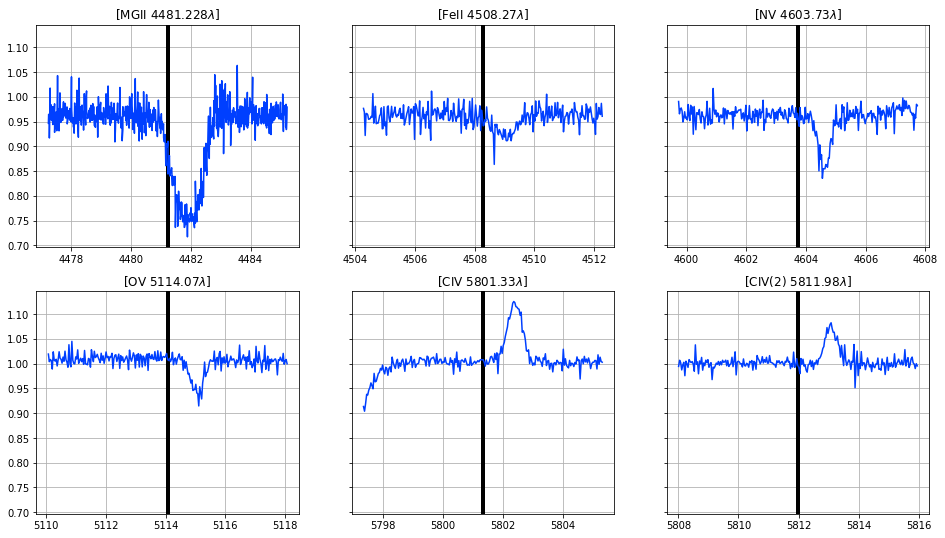

In [14]:
fig, axarr = plt.subplots(2, 3, figsize=(16,9), sharey=True)
window = 4 * u.AA

locs = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]

for idx, element in enumerate(spec_lines):

    temp_df = df[(df.col_0 > (spec_lines[element] - window)) & 
                 (df.col_0 < (spec_lines[element] + window))]
    
    axarr[locs[idx]].axvline(spec_lines[element].value, color='k', lw=4)
    axarr[locs[idx]].plot(temp_df.col_0, temp_df.col_1)
    
    axarr[locs[idx]].set_title(f'[{element} {spec_lines[element].value}$\lambda$]')
    axarr[locs[idx]].grid()

plt.show()

___
### Instrumental Profile

Select the Mg II absorption. Overplot a Gaussian, with a full width at half-maximum (FWHM) equal to $\lambda/R$.

$$I(x) = \exp\left(-\frac{x^2}{2\sigma^2}\right)$$

Additionally, I will attempt to fit a Gaussian to the lines because I suspect our first order approximation (given center and infered FWHM) will not be ample to describe the signal. Recall a Gaussian has the functional form,

$$f(x) = A\exp\left(-\frac{1}{2} \left(\frac{(x-\mu)}{\sigma}^2\right)\right) + y$$

which can be rexpressed in terms of the FWHM,

$$f(x) = A\exp\left(- \frac{4\ln(2)(x-\mu)^2}{\text{FWHM}^2}\right) + y$$

where I have introduced a parameter, $y$, which controls the vertical offset of the Gaussian.

In [15]:
from scipy.optimize import curve_fit

def gauss(x, *p):
    A, mu, FWHM, y = p
    return (A)*np.exp(-(4.*np.log(2)*(x-mu)**2) / FWHM**2) + y

def titles(*p):
    """
    Just a function to make my plot titles
    """
    global spec_lines_ars
    
    elem, mu, FWHM = p
    
    center = spec_lines_pars[elem]['center']
    
    return (f'[{elem} {center.value}$\lambda$] : \
            $\mu = ${mu.round(2)}, $FWHM = ${FWHM.round(2)}')

In [16]:
spec_lines_pars = {
        'MGII' : {"center" : 4481.228 * u.AA, "amp" : -0.3}, 
        'FeII' : {"center" : 4508.27 * u.AA, "amp" : -0.05}, 
        'NV' : {"center" : 4603.73 * u.AA, "amp" : -0.25}, 
        'OV' : {"center" : 5114.07 * u.AA, "amp" : -0.75}, 
        'CIV' : {"center" : 5801.33 * u.AA, "amp" : 0.1}, 
        'CIV(2)' : {"center" : 5811.98 * u.AA, "amp" : 0.1}
    }

/Users/kaimibk/miniconda3/envs/UHenv/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


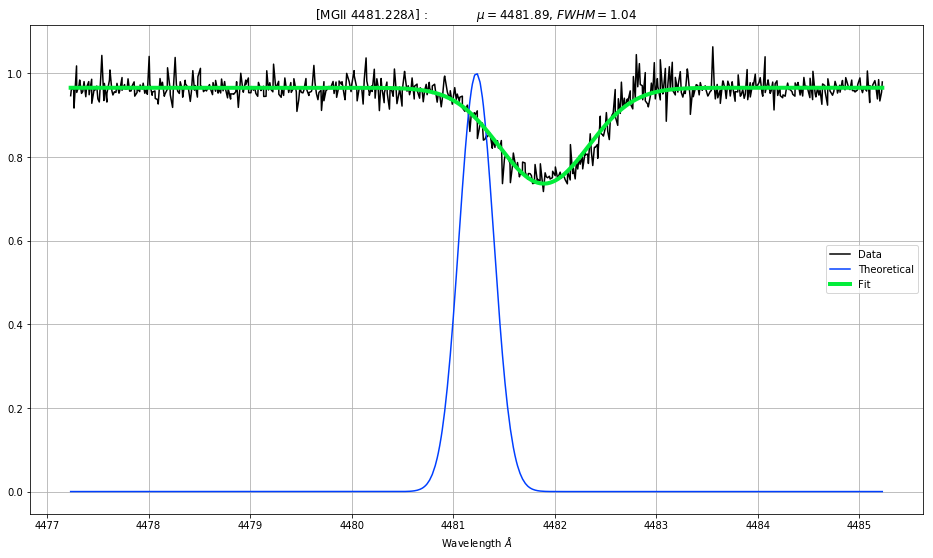

In [17]:
fig = plt.figure(figsize=(16,9))
window = 4 * u.AA

center = spec_lines_pars['MGII']['center']

temp_df = df[(df.col_0 > (center - window)) & (df.col_0 < (center + window))]

temp_df.sort_values(by=['col_0'], inplace=True)


plt.plot(temp_df.col_0, temp_df.col_1, label='Data', color='k')

plt.plot(temp_df.col_0, 
         np.exp(-(temp_df.col_0 - center.value)**2/ 
                (2*center.value/68000/2.235)), 
         label='Theoretical')


p0 = [-0.3, center.value, center.value/68000, 1.0]

popt, pcov = curve_fit(gauss, temp_df.col_0, 
                       temp_df.col_1, p0=p0, maxfev=10000)

hist_fit = gauss(temp_df.col_0, *popt)

plt.plot(temp_df.col_0, hist_fit, label='Fit', lw=4)

plt.title(titles("MGII", popt[1], popt[2]))
plt.xlabel(r'Wavelength $\AA$')

plt.grid()
plt.legend()
plt.show()

#### Repeating process for the remaining spectral lines

/Users/kaimibk/miniconda3/envs/UHenv/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


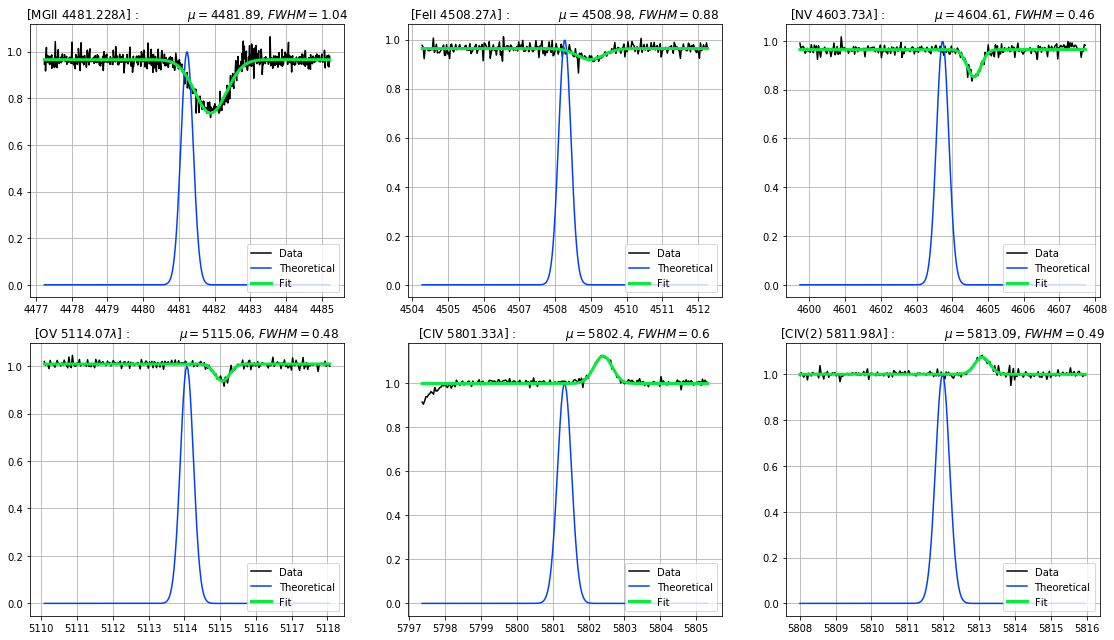

In [18]:
from uncertainties import ufloat

fig, axarr = plt.subplots(2, 3, figsize=(16,9))
window = 4 * u.AA

locs = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]

for idx, element in enumerate(spec_lines_pars):
    
    center = spec_lines_pars[element]['center']

    temp_df = df[(df.col_0 > (center - window)) & (df.col_0 < (center + window))]
    
    temp_df.sort_values(by=['col_0'], inplace=True)
    
    axarr[locs[idx]].plot(temp_df.col_0, temp_df.col_1, color='k', label='Data')
    
    axarr[locs[idx]].plot(temp_df.col_0, 
                          np.exp(-(temp_df.col_0 - center.value)**2/ 
                                 (2*center.value/68000/2.235)), 
                          label='Theoretical')

    p0 = [spec_lines_pars[element]["amp"], (center).value+1.0, 1.0, 1.0]

    popt, pcov = curve_fit(gauss, temp_df.col_0, 
                           temp_df.col_1, p0=p0, maxfev=10000)

    hist_fit = gauss(temp_df.col_0, *popt)

    axarr[locs[idx]].plot(temp_df.col_0, hist_fit, lw=3, label='Fit')   
    axarr[locs[idx]].set_title(titles(element, popt[1], popt[2]))
    
    spec_lines_pars[element]['mu'] = ufloat(popt[1], pcov[1,1])
    spec_lines_pars[element]['FWHM'] = ufloat(popt[2], pcov[2,2])
    
    axarr[locs[idx]].grid()
    axarr[locs[idx]].legend(loc=4)


plt.tight_layout()

plt.savefig('gauss_fit.png', dpi=300, bbox_inches='tight')
plt.show()

___
**Do you think there are other sources of broadening in addition to the instrumental broadening? What would you expect the most probable sources of extra broadening to be?**

Most definitely, there are external broadening effects. Specifically, a quickly rotating object would exhibit rotational broadening. Additionally, spectral profiles would be influenced by collisional broadening, doppler broadening, and the Zeeman effect.

___
### Measure Radial Velocities

Measure the center wavelength of each spectral feature and calculate the corresponding heliocentric radial velocities in [km/s], using $V = c\Delta\lambda/\lambda = c (\lambda - \lambda_0) / \lambda_0 $, where $\lambda_0$ notes the natural wavelength and $\lambda$ is the observed wavelength.

In [19]:
for element in spec_lines_pars.keys():
    mu = spec_lines_pars[element]['mu']
    true = spec_lines_pars[element]['center'].value
    
    print(element, '\n', '\t', ((const.c.value * (mu -  true)/ true)/1000.0), ' [km/s]')

MGII 
 	 44.406+/-0.005  [km/s]
FeII 
 	 46.96+/-0.11  [km/s]
NV 
 	 57.332+/-0.006  [km/s]
OV 
 	 58.115+/-0.010  [km/s]
CIV 
 	 55.499+/-0.010  [km/s]
CIV(2) 
 	 57.033+/-0.008  [km/s]


___
**Describe your results and offer an interpretation**

Inspecting the radial velocities, we notice two distinct radial velocity populations. Due to the low statistical errors, perhaps the spectral data is from more than one source. One population associated with the Mg and Fe lines, and the other to the N, O, and C lines.